In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q '/content/drive/MyDrive/Tensorflow Course 1/Horses and Humans/horse-or-human.zip'

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import shutil
import matplotlib.image as mpimg
from ipywidgets import widgets

In [4]:
original_horses_dir = '/content/horses'
original_humans_dir = '/content/humans'
new_base_dir = 'horses_and_humans'

os.makedirs(new_base_dir, exist_ok=True)

shutil.copytree(original_horses_dir, os.path.join(new_base_dir, 'horses'))
shutil.copytree(original_humans_dir, os.path.join(new_base_dir, 'humans'))

print(f'succesfully copied the files to the new {new_base_dir} directory')

succesfully copied the files to the new horses_and_humans directory


In [6]:
train_dir = '/content/horses_and_humans'

print(f'subdirecories inside the {train_dir} directory: {os.listdir(train_dir)}')

subdirecories inside the /content/horses_and_humans directory: ['horses', 'humans']


In [7]:
# Directory with the training horse pictures
train_horse_dir = os.path.join(train_dir, 'horses')

# Directory with the training human pictures
train_human_dir = os.path.join(train_dir, 'humans')

# Check the filenames
train_horse_names = os.listdir(train_horse_dir)
print(f"5 files in horses subdir: {train_horse_names[:5]}")
train_human_names = os.listdir(train_human_dir)
print(f"5 files in humans subdir:{train_human_names[:5]}")

5 files in horses subdir: ['horse01-2.png', 'horse46-1.png', 'horse16-2.png', 'horse38-6.png', 'horse34-7.png']
5 files in humans subdir:['human06-05.png', 'human13-22.png', 'human01-02.png', 'human04-29.png', 'human11-14.png']


In [8]:
print(f"total training horse images: {len(os.listdir(train_horse_dir))}")
print(f"total training human images: {len(os.listdir(train_human_dir))}")

total training horse images: 500
total training human images: 527


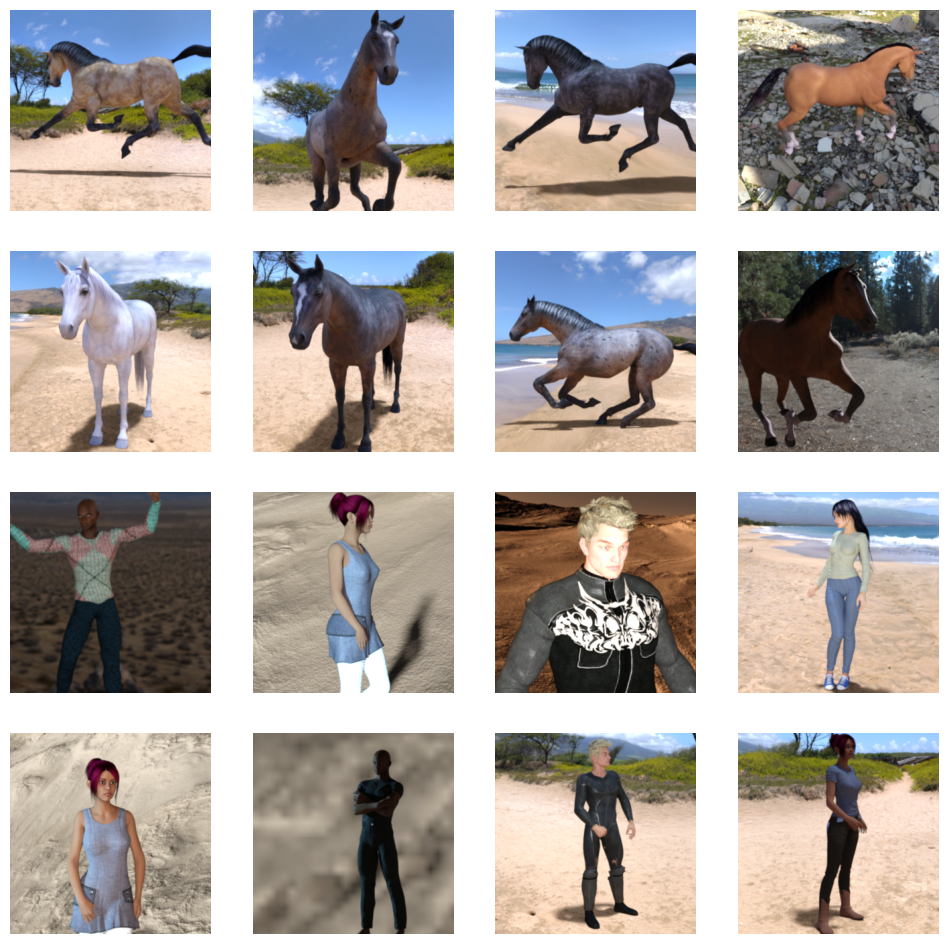

In [9]:
# Parameters for your graph; you will output images in a 4x4 configuration
nrows = 4
ncols = 4

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in random.sample(train_horse_names, k=8)]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in random.sample(train_human_names, k=8)]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Input(shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0 to 1 where 0 is for 'horses' and 1 for 'humans'
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

In [13]:
# Instantiate the dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(300, 300),
    batch_size=32,
    label_mode='binary'
    )


# Check the type
dataset_type = type(train_dataset)
print(f'train_dataset inherits from tf.data.Dataset: {issubclass(dataset_type, tf.data.Dataset)}')

Found 1027 files belonging to 2 classes.
train_dataset inherits from tf.data.Dataset: True


In [14]:
# Get one batch from the dataset
sample_batch = list(train_dataset.take(1))[0]

# Check that the output is a pair
print(f'sample batch data type: {type(sample_batch)}')
print(f'number of elements: {len(sample_batch)}')

# Extract image and label
image_batch = sample_batch[0]
label_batch = sample_batch[1]

# Check the shapes
print(f'image batch shape: {image_batch.shape}')
print(f'label batch shape: {label_batch.shape}')

sample batch data type: <class 'tuple'>
number of elements: 2
image batch shape: (32, 300, 300, 3)
label batch shape: (32, 1)


In [15]:
print(image_batch[0].numpy())

[[[191. 200. 207.]
  [193. 201. 208.]
  [195. 202. 208.]
  ...
  [138. 149. 162.]
  [137. 148. 161.]
  [136. 147. 160.]]

 [[191. 199. 206.]
  [191. 199. 206.]
  [192. 200. 207.]
  ...
  [137. 149. 161.]
  [136. 148. 160.]
  [135. 147. 159.]]

 [[192. 198. 206.]
  [192. 199. 206.]
  [192. 199. 206.]
  ...
  [137. 148. 161.]
  [135. 147. 160.]
  [134. 146. 159.]]

 ...

 [[ 78.  61.  48.]
  [ 75.  59.  47.]
  [ 72.  56.  44.]
  ...
  [ 47.  38.  31.]
  [ 52.  42.  34.]
  [ 54.  44.  36.]]

 [[ 76.  60.  48.]
  [ 72.  57.  45.]
  [ 70.  55.  43.]
  ...
  [ 55.  45.  36.]
  [ 60.  49.  40.]
  [ 62.  51.  41.]]

 [[ 75.  59.  47.]
  [ 72.  56.  44.]
  [ 69.  54.  42.]
  ...
  [ 61.  50.  40.]
  [ 65.  54.  44.]
  [ 69.  56.  46.]]]


In [16]:
# Check the range of values
print(f'max value: {np.max(image_batch[0].numpy())}')
print(f'min value: {np.min(image_batch[0].numpy())}')

max value: 255.0
min value: 5.0


In [19]:
rescale_layer = tf.keras.layers.Rescaling(scale=1./255)

In [20]:
image_scaled = rescale_layer(image_batch[0].numpy())

print(image_scaled)

tf.Tensor(
[[[0.7490196  0.7843138  0.8117648 ]
  [0.7568628  0.78823537 0.81568635]
  [0.76470596 0.79215693 0.81568635]
  ...
  [0.5411765  0.58431375 0.63529414]
  [0.5372549  0.5803922  0.6313726 ]
  [0.53333336 0.5764706  0.627451  ]]

 [[0.7490196  0.7803922  0.8078432 ]
  [0.7490196  0.7803922  0.8078432 ]
  [0.75294125 0.7843138  0.8117648 ]
  ...
  [0.5372549  0.58431375 0.6313726 ]
  [0.53333336 0.5803922  0.627451  ]
  [0.5294118  0.5764706  0.62352943]]

 [[0.75294125 0.77647066 0.8078432 ]
  [0.75294125 0.7803922  0.8078432 ]
  [0.75294125 0.7803922  0.8078432 ]
  ...
  [0.5372549  0.5803922  0.6313726 ]
  [0.5294118  0.5764706  0.627451  ]
  [0.5254902  0.57254905 0.62352943]]

 ...

 [[0.30588236 0.2392157  0.18823531]
  [0.29411766 0.23137257 0.18431373]
  [0.28235295 0.21960786 0.17254902]
  ...
  [0.18431373 0.14901961 0.12156864]
  [0.20392159 0.16470589 0.13333334]
  [0.21176472 0.17254902 0.14117648]]

 [[0.29803923 0.23529413 0.18823531]
  [0.28235295 0.22352943 0

In [21]:
print(f'max value: {np.max(image_scaled)}')
print(f'min value: {np.min(image_scaled)}')

max value: 1.0
min value: 0.019607843831181526


In [22]:
# Rescale the image using a lambda function
train_dataset_scaled = train_dataset.map(lambda image, label: (rescale_layer(image), label))


# # Same result as above but without using a lambda function
# # define a function to rescale the image
# def rescale_image(image, label):
#     return rescale_layer(image), label

# dataset_scaled = dataset.map(rescale_image)

In [28]:
# Get one batch of data
sample_batch =  list(train_dataset_scaled.take(1))[0]

# Get the image
image_scaled = sample_batch[0][1].numpy()
print(image_scaled)

# Check the range of values for this image
print(f'max value: {np.max(image_scaled)}')
print(f'min value: {np.min(image_scaled)}')

[[[0.14901961 0.20392159 0.24313727]
  [0.14901961 0.20000002 0.24313727]
  [0.14901961 0.20000002 0.24313727]
  ...
  [0.08235294 0.10196079 0.11764707]
  [0.08235294 0.10196079 0.12156864]
  [0.08235294 0.10196079 0.12156864]]

 [[0.14901961 0.20392159 0.24313727]
  [0.14901961 0.20000002 0.24313727]
  [0.14901961 0.20392159 0.24313727]
  ...
  [0.08235294 0.10196079 0.12156864]
  [0.08235294 0.10196079 0.12156864]
  [0.08235294 0.10196079 0.12156864]]

 [[0.14901961 0.20392159 0.24313727]
  [0.14901961 0.20392159 0.24313727]
  [0.14901961 0.20392159 0.24313727]
  ...
  [0.08627451 0.10588236 0.12156864]
  [0.08627451 0.10588236 0.12156864]
  [0.08627451 0.10588236 0.12156864]]

 ...

 [[0.56078434 0.5294118  0.47450984]
  [0.5647059  0.5294118  0.4784314 ]
  [0.56078434 0.5254902  0.47450984]
  ...
  [0.6156863  0.57254905 0.5176471 ]
  [0.6156863  0.5764706  0.52156866]
  [0.5921569  0.5529412  0.49803925]]

 [[0.5529412  0.52156866 0.47058827]
  [0.54901963 0.5176471  0.46274513]


In [29]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                      )

In [32]:
print(type(train_dataset_final))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [33]:
history = model.fit(
    train_dataset_final,
    epochs=15,
    verbose=2
    )

Epoch 1/15
33/33 - 103s - 3s/step - accuracy: 0.6796 - loss: 0.6373
Epoch 2/15
33/33 - 128s - 4s/step - accuracy: 0.8423 - loss: 0.4214
Epoch 3/15
33/33 - 87s - 3s/step - accuracy: 0.9114 - loss: 0.2773
Epoch 4/15
33/33 - 87s - 3s/step - accuracy: 0.9318 - loss: 0.1918
Epoch 5/15
33/33 - 143s - 4s/step - accuracy: 0.9416 - loss: 0.1731
Epoch 6/15
33/33 - 86s - 3s/step - accuracy: 0.9445 - loss: 0.1517
Epoch 7/15
33/33 - 93s - 3s/step - accuracy: 0.9572 - loss: 0.1219
Epoch 8/15
33/33 - 135s - 4s/step - accuracy: 0.9669 - loss: 0.0968
Epoch 9/15
33/33 - 87s - 3s/step - accuracy: 0.9688 - loss: 0.0921
Epoch 10/15
33/33 - 87s - 3s/step - accuracy: 0.9649 - loss: 0.0960
Epoch 11/15
33/33 - 87s - 3s/step - accuracy: 0.9737 - loss: 0.0655
Epoch 12/15
33/33 - 87s - 3s/step - accuracy: 0.9844 - loss: 0.0552
Epoch 13/15
33/33 - 94s - 3s/step - accuracy: 0.9796 - loss: 0.0541
Epoch 14/15
33/33 - 135s - 4s/step - accuracy: 0.9873 - loss: 0.0391
Epoch 15/15
33/33 - 143s - 4s/step - accuracy: 0.986

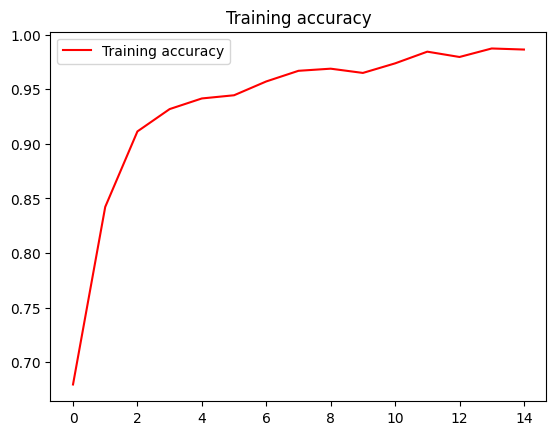

In [34]:
# Plot the training accuracy for each epoch

acc = history.history['accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.show()

In [36]:
from io import BytesIO

# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(300, 300))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0][0]

    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)

    # In newer ipywidgets versions, change.new contains a dictionary where keys are filenames
    # and values are dictionaries containing 'metadata' and 'content'.
    # The 'content' is already a bytes object.
    for filename, file_info in change.new.items():
        file_content = file_info['content']
        file_jpgdata = BytesIO(file_content)
        file_predict(filename, file_jpgdata, out)


# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 300, 300, 3))
  warnings.warn(msg)
/tmp/ipython-input-37-1170845695.py:41: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
/tmp/ipython-input-37-1170845695.py:44: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


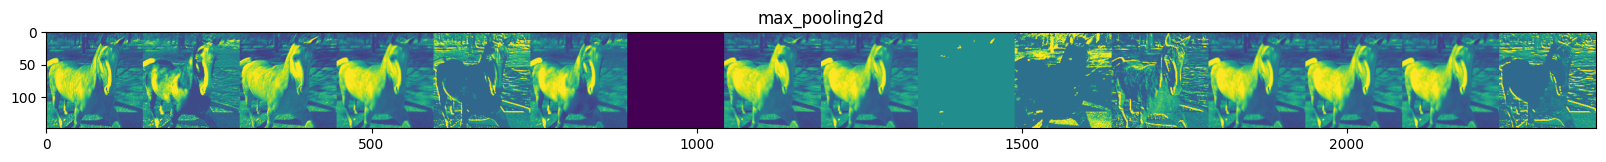

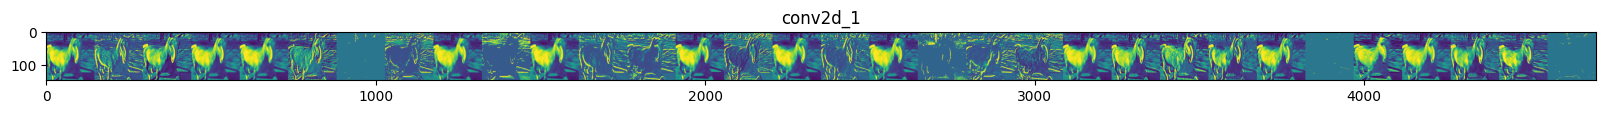

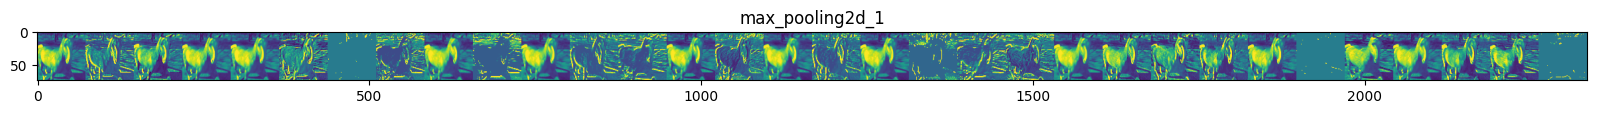

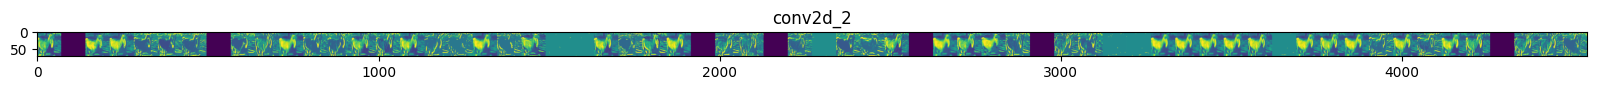

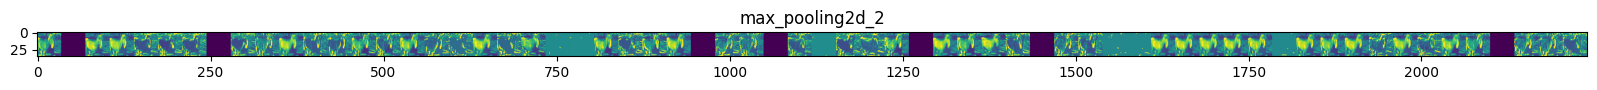

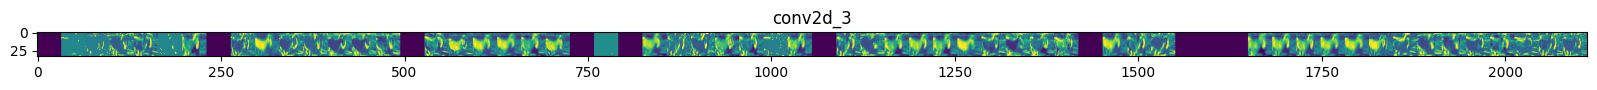

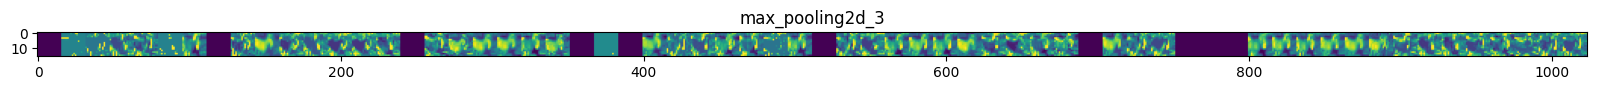

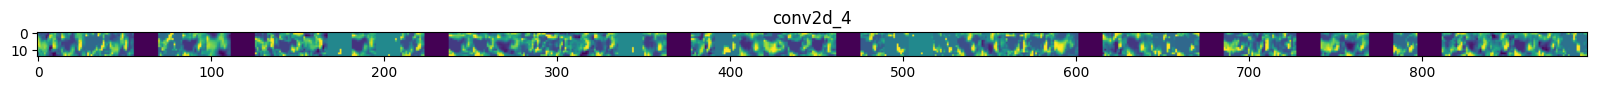

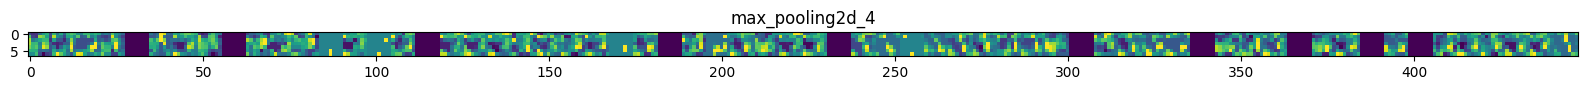

In [37]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = tf.keras.utils.load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = tf.keras.utils.img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x = rescale_layer(x)

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x, verbose=False)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')